In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

np.random.seed(0)

# save the trajectory into a file
import pickle
import os
# find the next available file path
def get_next_filename(base_name, extension):
    index = 1
    while True:
        filename = f"{base_name}_{index}.{extension}"
        if not os.path.exists(filename):
            return filename
        index += 1

# find the next available folder
def get_next_folder(base_name):
    index = 1
    while True:
        folder = f"{base_name}_{index}"
        if not os.path.exists(folder):
            return folder
        index += 1

# create a folder called world
folder = get_next_folder("world")
os.mkdir(folder)

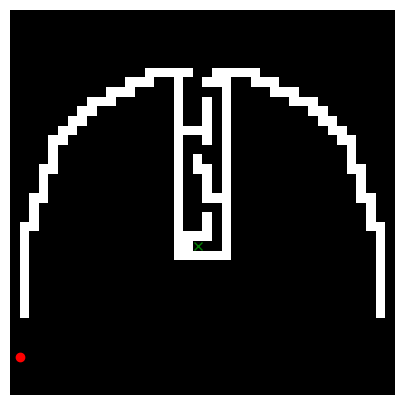

In [2]:
from maze_env import Maze
env = Maze(sparse=True)
env.plot()

In [3]:
#Create new env with estimated reward and train agent
new_env = Maze()
Q = new_env.train_Q_1_epoch(episodes=2000, episode_length=1000, use_start_zone=False, alpha=0.5,gamma=0.99,final_greediness=0.5,eps_anneal=True,disp=False,plot_freq=10)

In [4]:
# save the new Q as a pickle file
filename1 = f"{folder}/Q_table.pkl"
with open(filename1, "wb") as f:
    pickle.dump(Q, f)

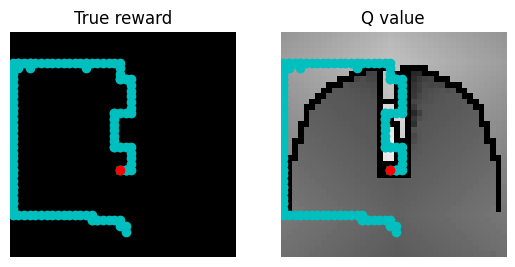

In [5]:
# Test agent on original world
traj = new_env.test_Q_once(Q,episode_length=200,disp=True, final_greediness=0.9, eps_anneal=False, use_start_zone=True)

In [9]:
# collect trajectories from 150 episodes
trajs = []
for i in range(1000):
    traj, _ = new_env.test_Q_once(Q,episode_length=400,disp=False, final_greediness=0.9, eps_anneal=False, use_start_zone=False)
    trajs.append(np.vstack(traj))
trajs = np.array(trajs,dtype=object)

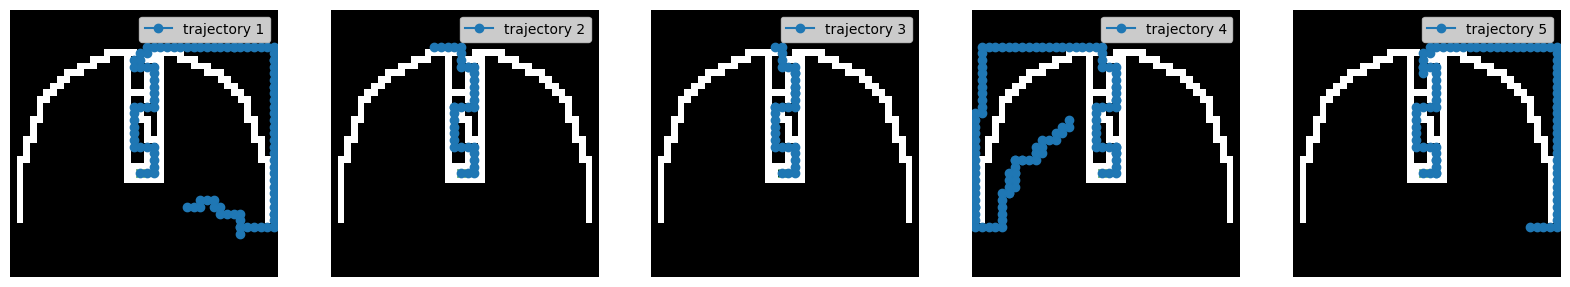

In [10]:
Q_image = np.max(Q,axis=1).reshape(env.Nx,env.Ny).T

num_plot = 5
fig, axs = plt.subplots(1, num_plot, figsize=(20,5))
# plot each state pair
for i in range(num_plot):
    # plot the first state
    axs[i].imshow(env.occ_map.T, origin="lower",extent=[0,env.Nx,0,env.Ny], cmap='gray')
    axs[i].plot(env.gx+0.5,env.gy+0.5,'gx') # goal location
    axs[i].plot(trajs[i][:,0]+0.5,trajs[i][:,1]+0.5, '-o',label=f'trajectory {i+1}')
    # finish up the rest of the plot settings
    axs[i].legend()
    axs[i].axis('off')
plt.show()

In [11]:

# save the trajectories into that folder
filename = f"{folder}/trajs.pkl"
# save the trajectories into that folder
with open(filename, "wb") as f:
    pickle.dump(trajs, f)
